# Classificazione origine degli oli dataset Idrocarburi principale

In [1]:
# librerie di base
import pandas as pd
import numpy as np
from sklearn.utils import class_weight
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt
import scikitplot as skplt
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.preprocessing import MinMaxScaler
import pickle #permette di esportare il modello
# librerie algoritmi
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

In [2]:
np.random.seed(42)

### Caricamento del dataset

In [3]:
df = pd.read_csv('../dataset/df_media_TIC_VOCs_min_1-40.csv')

### Dividiamo i dati in X (feature) e y (target) e creiamo una copia scalata dei dati

In [4]:
# divido il dataset in X (feature, dalla colonna 2 in poi) e y_origine (target, colonna 1)
X = df.iloc[:, 2:]
y_origine = df.iloc[:,0]
scaler = MinMaxScaler()
X_scalati = scaler.fit_transform(X)

In [5]:
# Inizializziamo queste liste per salvarci i risultati in modo tale da poterli stampare successivamente in un grafico
nome_modelli = []
accuratezze = []
precisioni_medie = []
recall_medie = []
f1_measure_medie = []

### Calcolo dei pesi delle classi

In [6]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_origine), y=y_origine)
class_weight_dizionario = dict(zip(np.unique(y_origine), class_weights))
class_weight_dizionario

{'grecia': 3.1,
 'grecia - peloponneso': 1.2916666666666667,
 'grecia-creta': 0.7045454545454546,
 'italia': 1.0689655172413792,
 'portogallo': 3.1,
 'spagna': 0.34065934065934067,
 'tunisia': 3.4444444444444446}

## KNN con validazione incrociata

### KNN

In [12]:
# istanzio il modello
knn = KNeighborsClassifier(n_neighbors=5)
scores = cross_val_score(knn, X, y_origine, cv=10)
print(f'Media: {scores.mean()}')
scores

Media: 0.8160173160173161


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


array([0.72727273, 0.81818182, 0.81818182, 0.68181818, 0.81818182,
       0.90909091, 0.86363636, 0.85714286, 0.85714286, 0.80952381])

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


                      precision    recall  f1-score   support

              grecia       0.33      0.30      0.32        10
grecia - peloponneso       0.69      0.83      0.75        24
        grecia-creta       0.81      0.95      0.88        44
              italia       0.89      0.83      0.86        29
          portogallo       0.00      0.00      0.00        10
              spagna       0.89      0.91      0.90        91
             tunisia       0.83      0.56      0.67         9

            accuracy                           0.82       217
           macro avg       0.64      0.63      0.62       217
        weighted avg       0.78      0.82      0.80       217



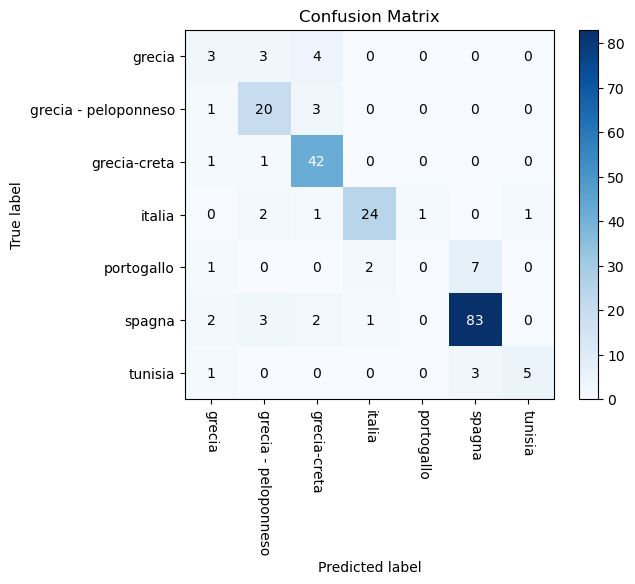

In [9]:
predizioni = cross_val_predict(knn, X, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [10]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('KNN')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)

#### KNN su dati scalati

In [11]:
knn_scale = KNeighborsClassifier()
scores = cross_val_score(knn_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8023809523809524


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


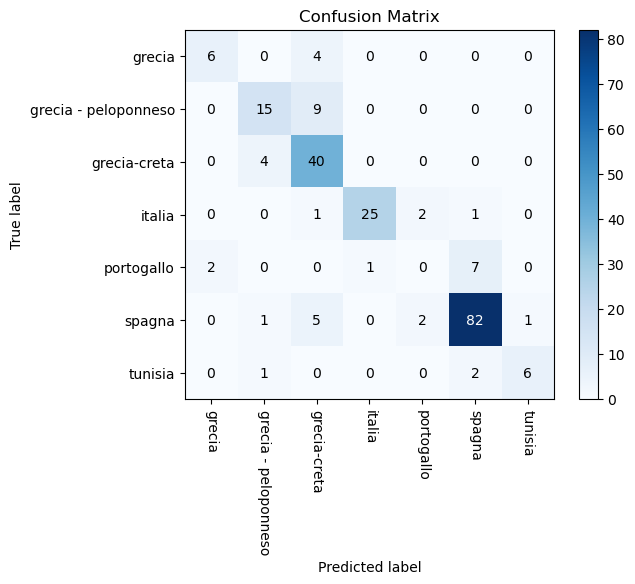

In [12]:
predizioni_scalati = cross_val_predict(knn_scale, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni_scalati))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni_scalati)
plt.xticks(rotation=-90)
plt.show()

## Decision Tree con validazione incrociata

### Decision Tree

In [13]:
dec_tree = DecisionTreeClassifier()
scores = cross_val_score(dec_tree, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.6229437229437229


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


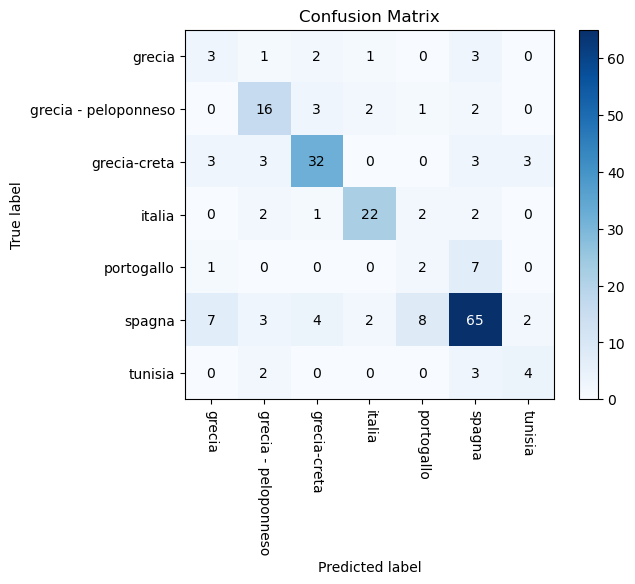

In [14]:
predizioni = cross_val_predict(dec_tree, X, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

### Decision Tree su dati scalati

In [15]:
dec_tree_scale = DecisionTreeClassifier()
scores = cross_val_score(dec_tree_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.6257575757575757


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


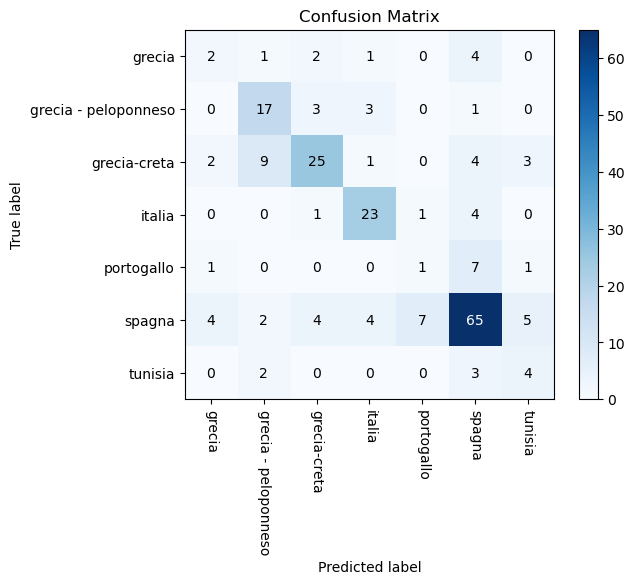

In [16]:
predizioni = cross_val_predict(dec_tree_scale, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [17]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('DecisionTree_scale')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)

## SVM (Support Vector Machine) con validazione incrociata

### SVC

In [16]:
svc = SVC(kernel='poly', C=1)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8389610389610389


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


In [44]:
svc_extract = SVC(kernel='poly', C=1, probability=True)
svc_extract.fit(X, y_origine)
with open('../modello predittivo finale/modello.pickle', 'wb') as f:
    pickle.dump(svc_extract, f)

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


                      precision    recall  f1-score   support

              grecia       0.50      0.10      0.17        10
grecia - peloponneso       0.78      0.88      0.82        24
        grecia-creta       0.85      0.93      0.89        44
              italia       0.93      0.86      0.89        29
          portogallo       1.00      0.10      0.18        10
              spagna       0.82      0.97      0.89        91
             tunisia       1.00      0.56      0.71         9

            accuracy                           0.84       217
           macro avg       0.84      0.63      0.65       217
        weighted avg       0.84      0.84      0.81       217



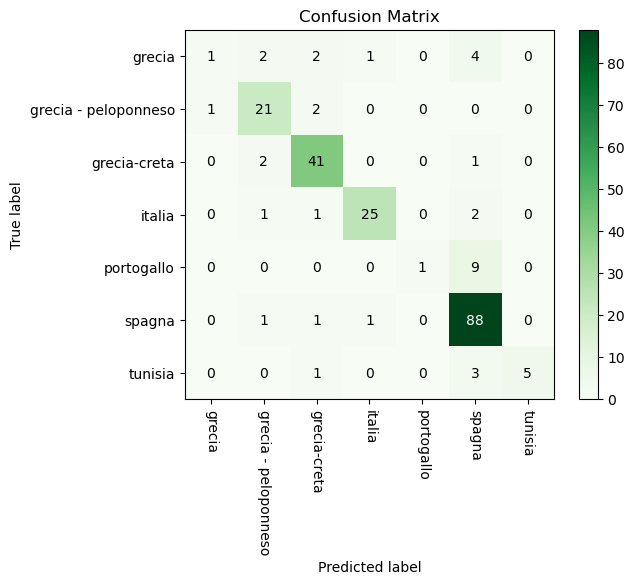

In [45]:
predizioni = cross_val_predict(svc, X, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni, cmap=plt.cm.Greens)
plt.xticks(rotation=-90)
plt.show()

In [21]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('SVC')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)

### SVC su dati scalati

In [22]:
svc_scale = SVC(kernel='poly', C=1)
scores = cross_val_score(svc_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.8435064935064934


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


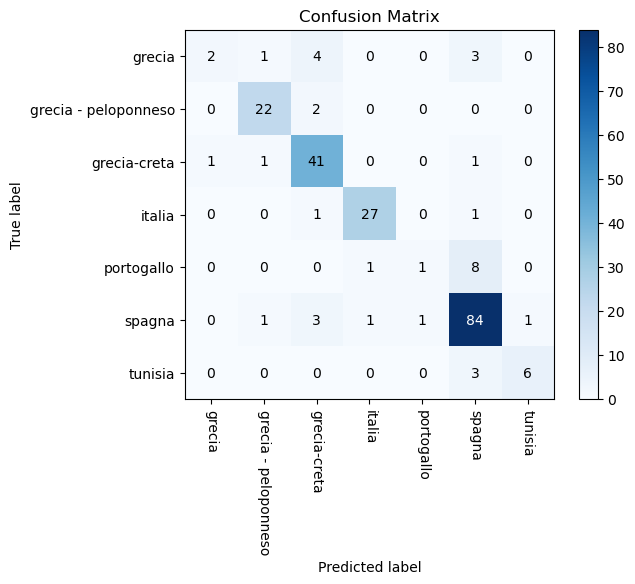

In [23]:
predizioni = cross_val_predict(svc_scale, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

## SVC con bilanciamento del modello

In [24]:
svc_w = SVC(kernel='poly', C=1, class_weight=class_weight_dizionario)
#il kernel poly è quello che da i risultati migliori rispetto a linear, rbf e sigmoid
scores = cross_val_score(svc_w, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.738095238095238


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


### Naive Bayes con convalida incrociata

In [25]:
nai_bay = GaussianNB()
scores = cross_val_score(nai_bay, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.6404761904761905


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


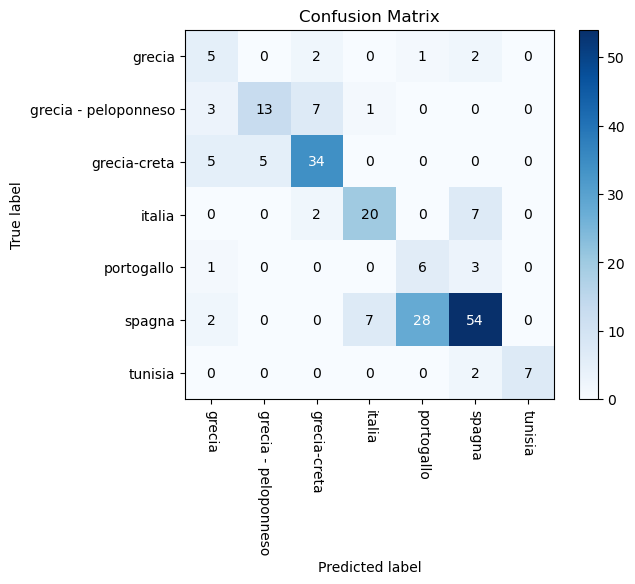

In [26]:
predizioni = cross_val_predict(nai_bay, X, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [27]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('Naive Bayes')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)

#### Naive Bayes su dati scalati

In [28]:
nai_bay_scale = GaussianNB()
scores = cross_val_score(nai_bay, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

Media: 0.6404761904761905


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


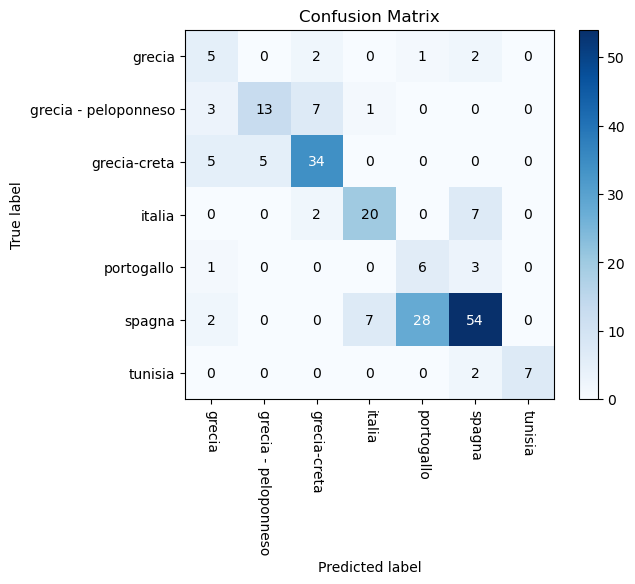

In [29]:
predizioni = cross_val_predict(nai_bay, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

## RandomForest con convalida incrociata

In [43]:
rand_for = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for, X, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8207792207792208


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(
/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: Undefin

                      precision    recall  f1-score   support

              grecia       1.00      0.20      0.33        10
grecia - peloponneso       0.86      0.75      0.80        24
        grecia-creta       0.77      0.93      0.85        44
              italia       0.93      0.93      0.93        29
          portogallo       0.00      0.00      0.00        10
              spagna       0.82      0.96      0.88        91
             tunisia       1.00      0.67      0.80         9

            accuracy                           0.83       217
           macro avg       0.77      0.63      0.66       217
        weighted avg       0.81      0.83      0.80       217



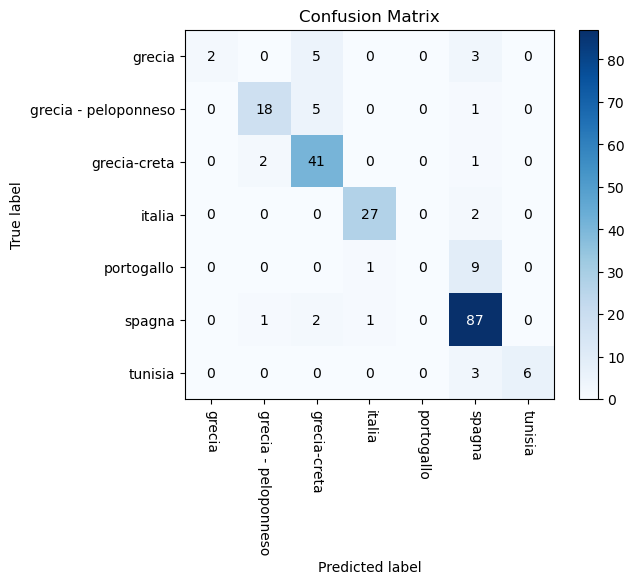

In [31]:
predizioni = cross_val_predict(rand_for, X, y_origine,  cv=10)
print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

In [32]:
diz_report = classification_report(y_origine, predizioni, output_dict=True)
nome_modelli.append('Random Forest')
accuratezze.append(round(diz_report.get('accuracy'),2)*100)
macro_avg = diz_report.get('macro avg')
precisioni_medie.append(round(macro_avg.get('precision'),2)*100)
recall_medie.append(round(macro_avg.get('recall'),2)*100)
f1_measure_medie.append(round(macro_avg.get('f1-score'),2)*100)

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

### RandomForest con dati scalati

In [33]:
rand_for_scale = RandomForestClassifier(n_estimators=100)
scores = cross_val_score(rand_for_scale, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.839177489177489


/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


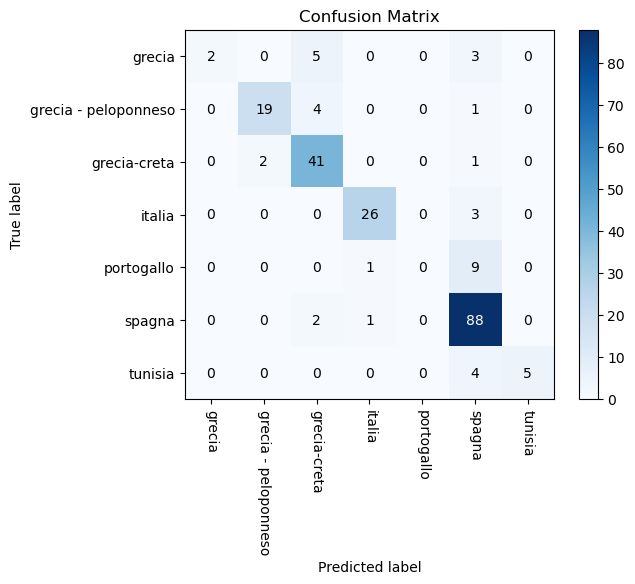

In [34]:
predizioni = cross_val_predict(rand_for_scale, X_scalati, y_origine,  cv=10)
#print(classification_report(y_origine, predizioni))
skplt.metrics.plot_confusion_matrix(y_origine, predizioni)
plt.xticks(rotation=-90)
plt.show()

### Random Forest con bilanciamento del modello

In [39]:
rand_for_w = RandomForestClassifier(n_estimators=100, class_weight=class_weight_dizionario)
scores = cross_val_score(rand_for_w, X_scalati, y_origine,  cv=10)
print(f'Media: {scores.mean()}')
#scores

/Users/manuelplacella/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 9 members, which is less than n_splits=10.
  warnings.warn(


Media: 0.8344155844155845


# In conclusione possiamo vedere come i risultati migliori li otteniamo con SVC o con RandomForest anche se osservando le varie matrici di confusione si nota come su Portogallo e Tunisia sono tanti gli errori. Ciò è dovuto con alta probabilità al fatto che i dati di addestramento per queste due origini sono pochi (fenomeno dello sbilanciamento del dataset)

# Costruzione grafico finale di confronto

In [40]:
tabella_risultati = pd.DataFrame({'Modello': nome_modelli, 'Accuratezza': accuratezze, 'Precisione media': precisioni_medie, 'Recall media': recall_medie, 'F1-score media': f1_measure_medie})
tabella_risultati.iloc[:, 1:] = tabella_risultati.iloc[:, 1:].astype(int)
tabella_risultati

,Modello,Accuratezza,Precisione media,Recall media,F1-score media
0,KNN,82,64,63,62
1,DecisionTree_scale,63,48,50,49
2,SVC,84,84,63,65
3,Naive Bayes,64,64,64,61
4,Random Forest,83,77,63,66


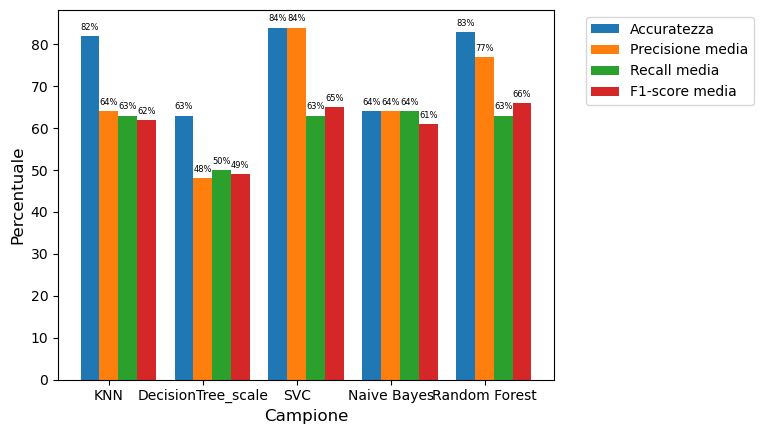

In [41]:

campioni = tabella_risultati['Modello']
percentuali = np.array([tabella_risultati.iloc[0, 1:], tabella_risultati.iloc[1, 1:], tabella_risultati.iloc[2, 1:], tabella_risultati.iloc[3, 1:], tabella_risultati.iloc[4, 1:]])

# creiamo il grafico
x = np.arange(len(campioni))
width = 0.2

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, percentuali[:,0], width, label='Accuratezza')
rects2 = ax.bar(x, percentuali[:,1], width, label='Precisione media')
rects3 = ax.bar(x + width, percentuali[:,2], width, label='Recall media')
rects4 = ax.bar(x + 2*width, percentuali[:,3], width, label='F1-score media')

ax.set_ylabel('Percentuale', fontsize=12)
ax.set_xlabel('Campione', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(campioni, fontsize=10)

# aggiungiamo il testo con il valore numerico sopra ogni rettangolo
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{:.0f}%'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize=6)

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)
autolabel(rects4)

ax.legend(fontsize=10)

# posizioniamo la legenda al di fuori del grafico
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.tick_params(axis='both', which='major', labelsize=10)

plt.show()